In [ ]:
!pip install xgboost

Train Seti Boyutu: 17232
Test Seti Boyutu: 4308

--- Baseline Model Sonuçları ---
MAE (Ortalama Mutlak Hata): 743.70
RMSE (Kök Ortalama Kare Hatası): 949.00
Test Verisi Ortalaması: 3590.11


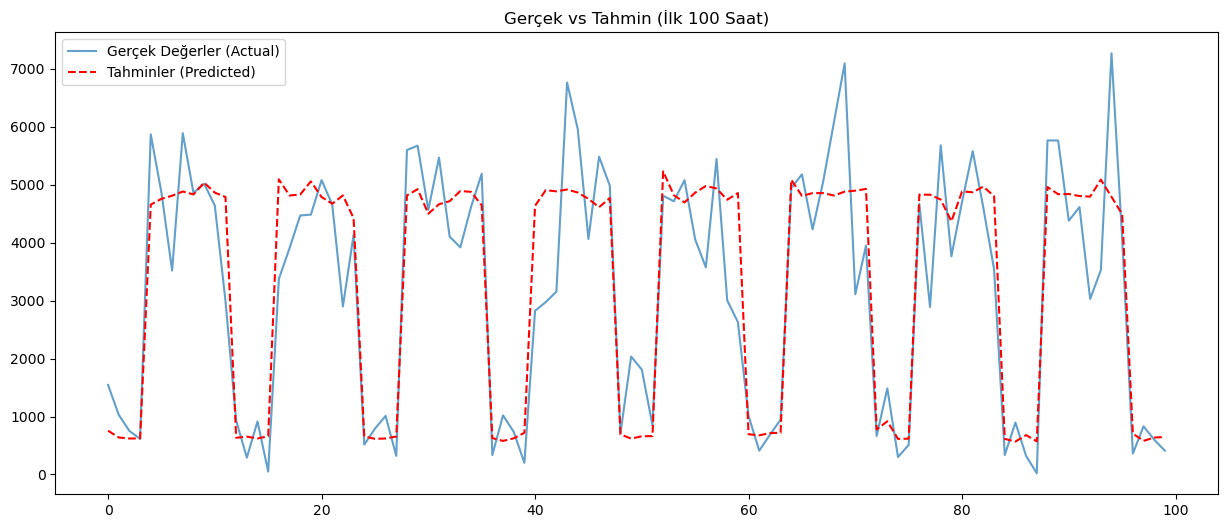

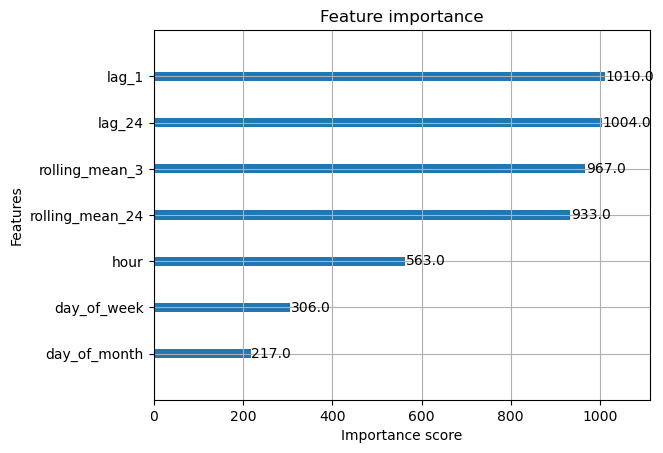

In [ ]:
import pandas as pd
import xgboost as xgb
import os

# 1. Veriyi Oku ve Hazırla
df = pd.read_csv('../data/atm_processed.csv')
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point]
test_df = df.iloc[split_point:]

features = ['hour', 'day_of_week', 'day_of_month', 'is_weekend', 
            'lag_1', 'lag_24', 'rolling_mean_3', 'rolling_mean_24']
target = 'totalOutcome'

X_train = train_df[features]
y_train = train_df[target]

# 2. Modeli Tekrar Eğit (Saniyeler sürer)
print("Model eğitiliyor...")
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
print("Eğitim tamamlandı.")

# 3. Modeli Kaydet
# Notebooks klasöründen bir üst klasöre (../) çıkıp models klasörüne kaydediyoruz
model_dir = '../models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'atm_model.json')
model.save_model(model_path)

print(f"✅ HARİKA! Model başarıyla şuraya kaydedildi: {model_path}")